In [1]:
%matplotlib inline
%matplotlib notebook
from ipynb.fs.defs.utilities import *
from colorspacious import cspace_converter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Computation of the Navion workspace

This notebook compute the workspace of the Navion and depicts the resulting field distributions in various scenario. This script was used to generate figures 2 and 3 in "[A Human-Scale Clinically Ready Electromagnetic Navigation System for Magnetically Responsive Biomaterials and Medical Devices](https://doi.org/10.1002/adma.202310701)," Advanced Materials (2024).

In [2]:
# Customized color bar 1 (2 colors)

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(70/256, 177/256, N)
vals[:, 1] = np.linspace(130/256, 78/256, N)
vals[:, 2] = np.linspace(180/256, 132/256, N)
newcmp = ListedColormap(vals)

# Customized color bar 2 (3 colors)
 
vals = np.ones((N, 4))
vals_seg1 = np.ones((N, 4))
vals_seg2 = np.ones((N, 4))

col1 = [70, 130, 180]
col2 = [214, 244, 255]
col3 = [227, 158, 33]
 
vals_seg1[:, 0] = np.linspace(col1[0]/256, col2[0]/256, N)
vals_seg1[:, 1] = np.linspace(col1[1]/256, col2[1]/256, N)
vals_seg1[:, 2] = np.linspace(col1[2]/256, col2[2]/256, N)

vals_seg2[:, 0] = np.linspace(col2[0]/256, col3[0]/256, N)
vals_seg2[:, 1] = np.linspace(col2[1]/256, col3[1]/256, N)
vals_seg2[:, 2] = np.linspace(col2[2]/256, col3[2]/256, N)

vals = np.concatenate((vals_seg1,vals_seg2))

cmp_blue_3col = ListedColormap(vals)
cmp_blue_3col_inv = ListedColormap(cmp_blue_3col.colors[::-1])

cmp_blue_3col

# Customized color bar 3 (4 colors)

vals = np.ones((N, 4))
vals_seg1 = np.ones((N, 4))
vals_seg2 = np.ones((N, 4))
vals_seg3 = np.ones((N, 4))

col1 = [70, 130, 180]
col2 = [227, 158, 33]
col3 = [255, 236, 203]
col4 = [138, 115, 86]
 
vals_seg1[:, 0] = np.linspace(col1[0]/256, col2[0]/256, N)
vals_seg1[:, 1] = np.linspace(col1[1]/256, col2[1]/256, N)
vals_seg1[:, 2] = np.linspace(col1[2]/256, col2[2]/256, N)

vals_seg2[:, 0] = np.linspace(col2[0]/256, col3[0]/256, N)
vals_seg2[:, 1] = np.linspace(col2[1]/256, col3[1]/256, N)
vals_seg2[:, 2] = np.linspace(col2[2]/256, col3[2]/256, N)

vals_seg3[:, 0] = np.linspace(col3[0]/256, col4[0]/256, N)
vals_seg3[:, 1] = np.linspace(col3[1]/256, col4[1]/256, N)
vals_seg3[:, 2] = np.linspace(col3[2]/256, col4[2]/256, N)

vals = np.concatenate((vals_seg1,vals_seg2,vals_seg3))

cmp_blue_4col = ListedColormap(vals,name='cmp_blue_4col')
cmp_blue_4col_inv = ListedColormap(cmp_blue_4col.colors[::-1],name='cmp_blue_4col_inv')


# Customized

col_l = [255, 255, 255]
col_d = [200, 200, 200]

vals_seg1[:, 0] = np.linspace(col_l[0]/256, col_d[0]/256, N)
vals_seg1[:, 1] = np.linspace(col_l[1]/256, col_d[1]/256, N)
vals_seg1[:, 2] = np.linspace(col_l[2]/256, col_d[2]/256, N)

vals = vals_seg1

n = 10
for i in range(n):
    vals = np.concatenate((vals,vals_seg1))

mask1 =  np.linspace(1, col1[0]/256, (n+1)*N)
mask2 =  np.linspace(1, col1[1]/256, (n+1)*N)
mask3 =  np.linspace(1, col1[2]/256, (n+1)*N)

vals[:, 0] = np.multiply(vals[:, 0],mask1)
vals[:, 1] = np.multiply(vals[:, 1],mask2)
vals[:, 2] = np.multiply(vals[:, 2],mask3)

cmp_alter = ListedColormap(vals)


# Customized

col_l = [200, 200, 200]
col_d = [col1[0], col1[1], col1[2]]

vals_seg1[:, 0] = np.linspace(col_l[0]/256, col_d[0]/256, N)
vals_seg1[:, 1] = np.linspace(col_l[1]/256, col_d[1]/256, N)
vals_seg1[:, 2] = np.linspace(col_l[2]/256, col_d[2]/256, N)

vals = vals_seg1

n = 1
for i in range(n):
    vals = np.concatenate((vals,vals_seg1))

mask1 =  np.linspace(1, col1[0]/256, (n+1)*N)
mask2 =  np.linspace(1, col1[1]/256, (n+1)*N)
mask3 =  np.linspace(1, col1[2]/256, (n+1)*N)

#vals[:, 0] = np.multiply(vals[:, 0],mask1)
#vals[:, 1] = np.multiply(vals[:, 1],mask2)
#vals[:, 2] = np.multiply(vals[:, 2],mask3)

cmp_alter2 = ListedColormap(vals)



In [3]:
# Load system calibration
cal_path_navion = os.path.join('models/Navion_2_Calibration_24-02-2020.yaml')

model_navion = ForwardModelMPEM()
model_navion.setCalibrationFile(cal_path_navion)

# Single plane

In [4]:
def ComputeMaxFieldInPos(model_mns,position,Imin,Imax):
    
    J = model_mns.getFieldActuationMatrix(position)

    #Check feasibility at each grid point            
    N, d = HyperPlaneShiftingMethod(J,Imin,Imax)

    bmax = np.min(d)

    return bmax

def ComputeMaxField(Nx,Ny,Nz,pmin,pmax,Imin,Imax,model_mns,threshold_mT=-1):

    p_ws = np.empty((0,3))
    max_field_mT = np.array([])

    posx_v = np.linspace(pmin[0], pmax[0], Nx, endpoint=True)
    posy_v = np.linspace(pmin[1], pmax[1], Ny, endpoint=True)
    posz_v = np.linspace(pmin[2], pmax[2], Nz, endpoint=True) 

    for i in range(posx_v.shape[0]):
        for j in range(posy_v.shape[0]):
            for k in range(posz_v.shape[0]):
                
                                
                x = posx_v[i]
                y = posy_v[j]
                z = posz_v[k]

                position = np.array([posx_v[i],posy_v[j],posz_v[k]])
                bmax = ComputeMaxFieldInPos(model_mns,position,Imin,Imax)
                
                if bmax > threshold_mT/1000:
                    p_ws = np.append(p_ws, [position], axis=0)                
                    max_field_mT = np.append(max_field_mT, [bmax*1000], axis=0)
                
    return p_ws, max_field_mT

In [5]:
#Horizontal plane
Nx = 100
Ny = 100
Nz = 1

#Build initial box
pmin_hor = np.array([-0.25,-0.20,0.])
pmax_hor = np.array([0.25,0.20,0.])

p_hor, max_field_hor = ComputeMaxField(Nx,Ny,Nz,pmin_hor,pmax_hor,-35,35,model_navion)

In [6]:
x_hor = np.linspace(pmin_hor[0], pmax_hor[0], 500, endpoint=True)
y_hor = np.linspace(pmin_hor[1], pmax_hor[1], 500, endpoint=True)
z_hor = griddata((p_hor[:,0], p_hor[:,1]), max_field_hor/1000, (x_hor[None,:], y_hor[:,None]), method='linear')

<IPython.core.display.Javascript object>


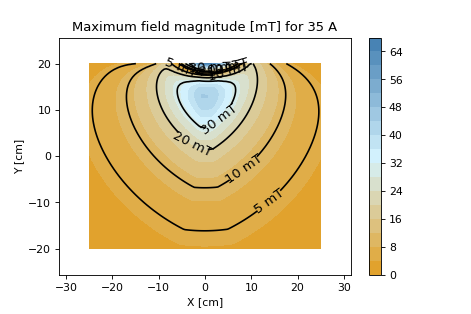

In [7]:
fig = plt.figure()

ax = fig.gca()
cs = ax.contour(x_hor*100, y_hor*100, z_hor*1000, [5, 10 ,20, 30], alpha=1.0, colors='black', vmin=max_field_hor.min(), vmax=max_field_hor.max())
s2 = ax.contourf(x_hor*100, y_hor*100, z_hor*1000, 20, cmap=cmp_blue_3col_inv, alpha=1.0, vmin=max_field_hor.min(), vmax=max_field_hor.max())

ax.clabel(cs, inline=1, fontsize=12, fmt='%1.0f mT')

ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(pmin_hor[0],pmax_hor[0])
ax.set_ylim(pmin_hor[1],pmax_hor[1])
ax.set_title('Maximum field magnitude [mT] for 35 A')
ax.axis('equal')

fig.colorbar(s2)

plt.show()

<IPython.core.display.Javascript object>


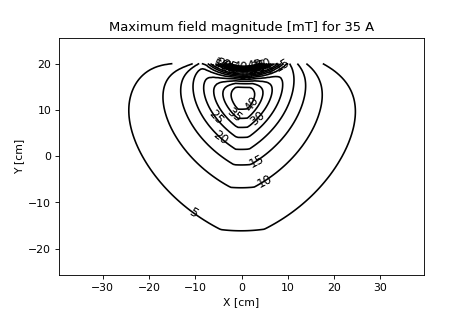

In [8]:
fig = plt.figure()

ax = fig.gca()
cs = ax.contour(x_hor*100, y_hor*100, z_hor*1000, [5, 10 ,15,20,25, 30,35,40,45], alpha=1.0, colors='black', vmin=max_field_hor.min(), vmax=max_field_hor.max())
#s2 = ax.contourf(x_hor*100, y_hor*100, z_hor*1000, 20, cmap=cmp_blue_3col_inv, alpha=1.0, vmin=max_field_hor.min(), vmax=max_field_hor.max())

ax.clabel(cs, inline=0, fontsize=11, fmt='%1.0f')

ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(pmin_hor[0],pmax_hor[0])
ax.set_ylim(pmin_hor[1],pmax_hor[1])
ax.set_title('Maximum field magnitude [mT] for 35 A')
ax.axis('equal')

#fig.colorbar(s2)

plt.show()

In [9]:
fig.savefig('isolines.svg')

# Volume

In [10]:
def ComputeMaxFieldPlane(Nx,Ny,pmin,pmax,offset,Imin,Imax,model_mns,zdir="z"):

    p_ws = np.empty((0,3))
    max_field_mT = np.array([])

    posx_v = np.linspace(pmin[0], pmax[0], Nx, endpoint=True)
    posy_v = np.linspace(pmin[1], pmax[1], Ny, endpoint=True)

    for i in range(posx_v.shape[0]):
        for j in range(posy_v.shape[0]):
                            
                x = posx_v[i]
                y = posy_v[j]

                if zdir == "z":
                    idx = 0
                    idy = 1
                    position = np.array([x,y,offset])
                elif zdir == "y":
                    idx = 2
                    idy = 0
                    position = np.array([y,offset,x])
                elif zdir == "x":
                    idx = 1
                    idy = 2
                    position = np.array([offset,x,y])
                
                bmax = ComputeMaxFieldInPos(model_mns,position,Imin,Imax)
                
                p_ws = np.append(p_ws, [position], axis=0)                
                max_field_mT = np.append(max_field_mT, [bmax*1000], axis=0)
    
    
    px_ = np.linspace(pmin[0], pmax[0], 70, endpoint=True)
    py_ = np.linspace(pmin[1], pmax[1], 70, endpoint=True)
    px, py = np.meshgrid(px_,py_)
    field = griddata((p_ws[:,idx], p_ws[:,idy]), max_field_mT/1000, (px_[None,:], py_[:,None]), method='linear')
    
    return px, py, field

In [11]:
#Volume
Nx = 50
Ny = 50

#Build initial box
pmin = np.array([-0.25,-0.25])
pmax = np.array([0.25,0.15])
Nxy = 40
offsetz = np.linspace(-0.20, 0.25, Nxy, endpoint=True)
zdir = 'z'

max_field_xy = []

for i in range(Nxy):
    px_xy, py_xy, max_field = ComputeMaxFieldPlane(Nx,Ny,pmin,pmax,offsetz[i],-50,50,model_navion,zdir=zdir)
    max_field_xy.append(max_field)

In [12]:
#Build initial box
pmin = np.array([-0.25,-0.25])
pmax = np.array([0.25,0.25])
Nxz = 4
offsety = np.linspace(-0.10, 0.15, Nxz, endpoint=True)
ydir = 'y'

max_field_xz = []

for i in range(Nxz):
    px_xz, py_xz, max_field = ComputeMaxFieldPlane(Nx,Ny,pmin,pmax,offsety[i],-50,50,model_navion,zdir=ydir)
    max_field_xz.append(max_field)

In [93]:
# Plot 3D coils
def PlotCoils3D_coord(length,radius,center,direction,ax,DoRaster=False):
    # length: length of the coils representation
    # radius: radius of the coils representation
    # ax: axis of the figure to represent the coils
    # DoRaster: rasterize the representation [True] or not [False]
    
    x_center = center[0]
    y_center = center[1]
    z_center = center[2]

    v_dir = np.array([direction[0], direction[1], direction[2]]) #dir

    #axis and radius
    p0 = np.array([x_center, y_center, z_center]) - length/2*v_dir #point at one end
    p1 = np.array([x_center, y_center, z_center]) + length/2*v_dir #point at other end

    #vector in direction of axis
    v = p1 - p0

    #find magnitude of vector
    mag = np.linalg.norm(v)

    #unit vector in direction of axis
    v = v / mag

    #make some vector perpendicular to v
    not_v_mat = np.array([[-v[1],v[0],0.],[-v[2],0.,v[0]],[0.,v[2],-v[1]]])
    norm_vec = np.linalg.norm(not_v_mat, axis=1)
    not_v = not_v_mat[np.argmax(norm_vec),:]

    #make vector perpendicular to v
    n1 = np.cross(v, not_v)
    #normalize n1
    n1 /= np.linalg.norm(n1)

    #make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)

    #surface ranges over t from 0 to length of axis and 0 to 2*pi
    t = np.linspace(0, mag, 2)
    theta = np.linspace(0, 2 * np.pi, 360) #use 360 for good sampling
    rsample = np.linspace(0, radius, 2)

    #use meshgrid to make 2d arrays
    t, theta2 = np.meshgrid(t, theta)

    rsample,theta = np.meshgrid(rsample, theta)

    #generate coordinates for surface
    # "Tube"
    X, Y, Z = [p0[i] + v[i] * t + radius * np.sin(theta2) * n1[i] + radius * np.cos(theta2) * n2[i] for i in [0, 1, 2]]
    # "Bottom"
    X2, Y2, Z2 = [p0[i] + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    # "Top"
    X3, Y3, Z3 = [p0[i] + v[i]*mag + rsample[i] * np.sin(theta) * n1[i] + rsample[i] * np.cos(theta) * n2[i] for i in [0, 1, 2]]

    
     #rstride=1, cstride=1, linewidth=0, 
        
    #e39e21ff
        
    ax.plot_surface(X, Y, Z, color='peru', rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=1.0, rasterized=DoRaster)
    ax.plot_surface(X2, Y2, Z2, color="peru",rstride=1, cstride=1, linewidth=0,  alpha=1.0, rasterized=DoRaster)
    ax.plot_surface(X3, Y3, Z3, color="peru",rstride=1, cstride=1, linewidth=0,  alpha=1.0, rasterized=DoRaster)

<IPython.core.display.Javascript object>


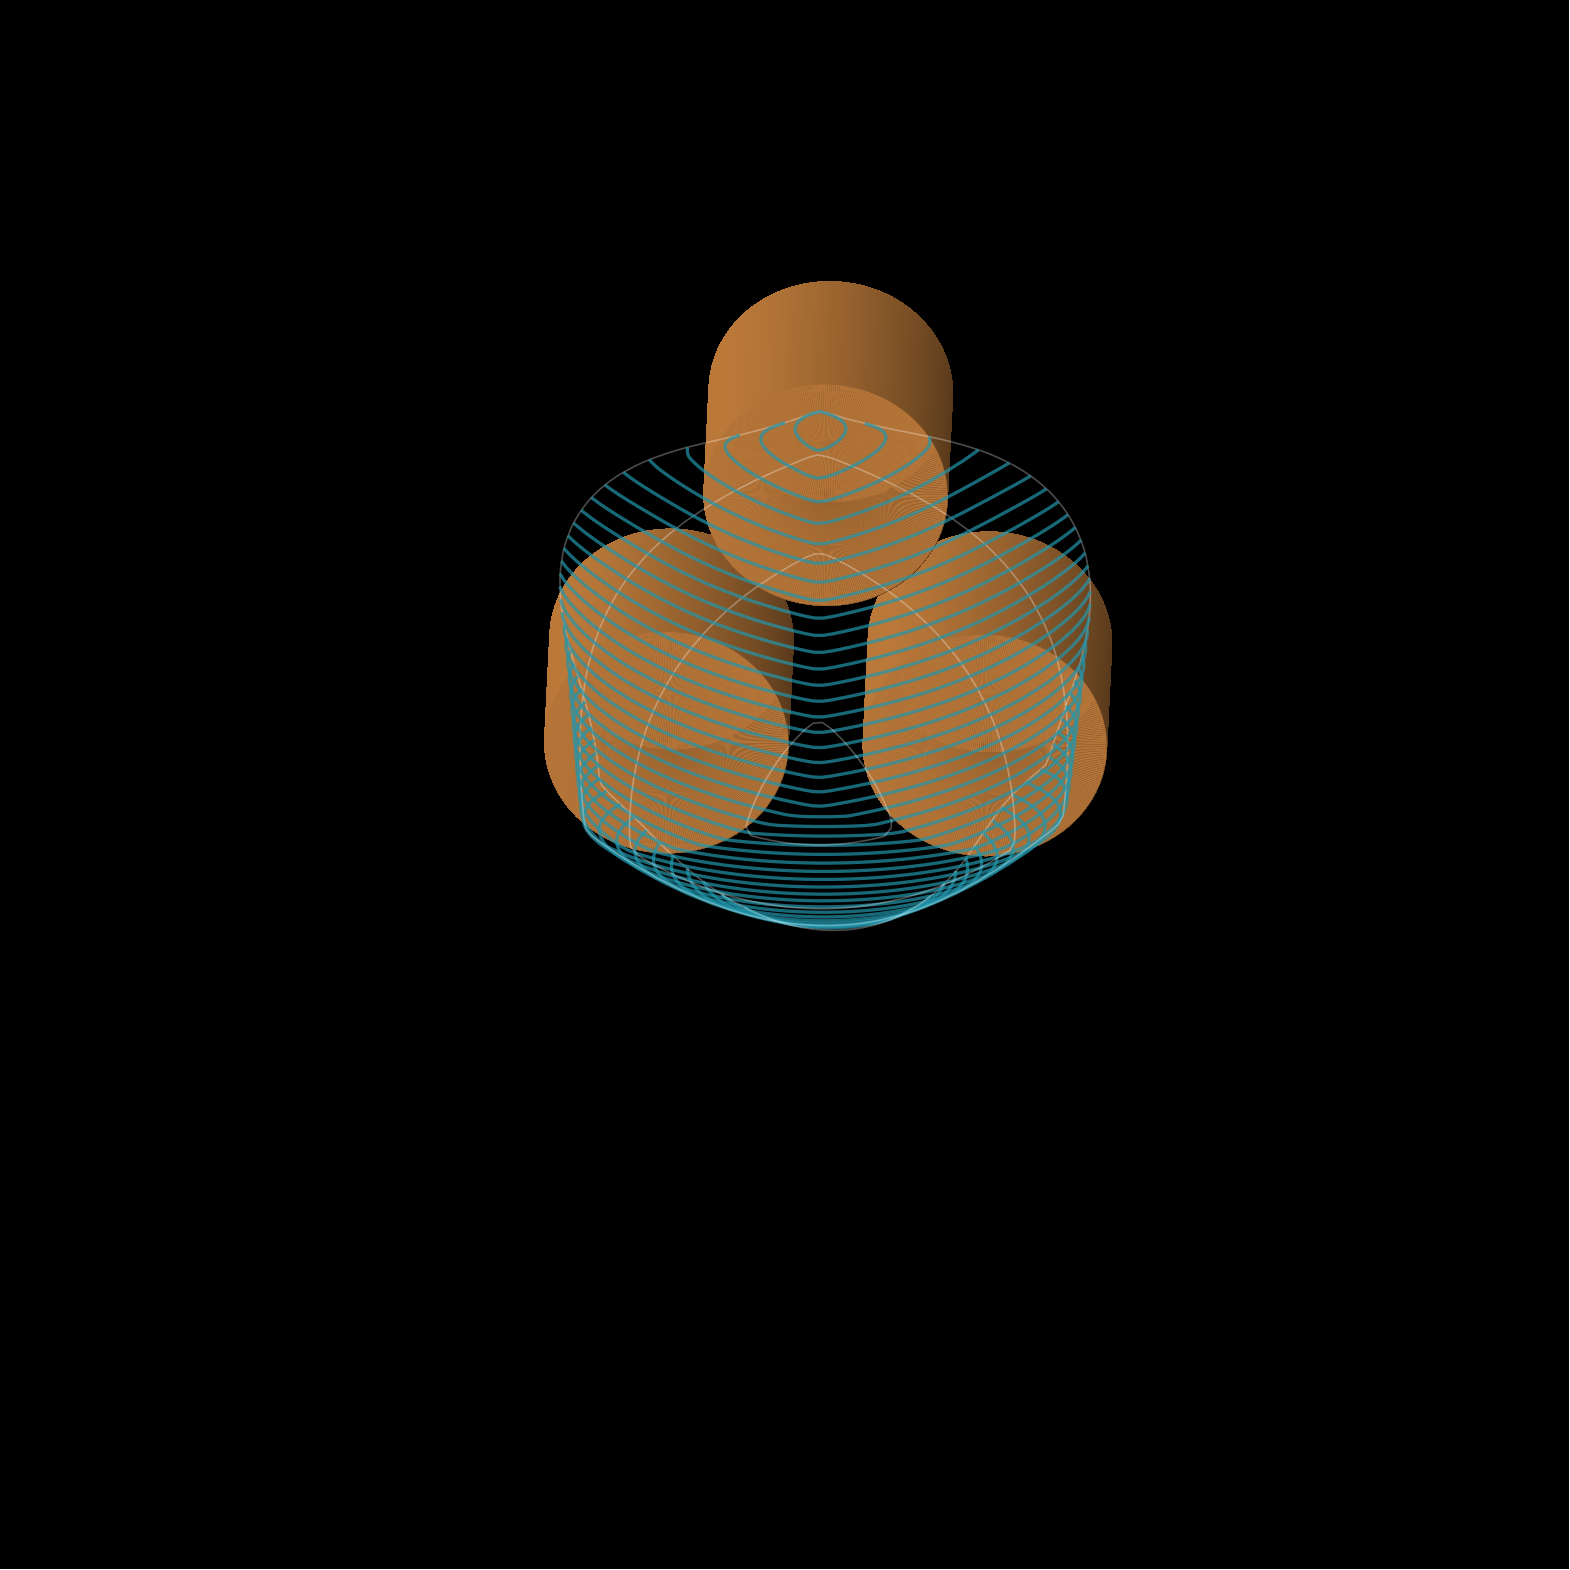

In [100]:
cmap = cmp_alter2

fig = plt.figure(figsize=(20, 20))

plt.style.use('dark_background')
             
ax = plt.axes(projection='3d',proj_type = 'ortho')

ax.view_init(elev= 17, azim = -151)
#ax.view_init(elev= 0, azim = 180)

alpha_min = 0.3
alpha_max = 1.


dcoil = 10
R = 15

# Draw a circle on the x=0 'wall'
coil1 = Circle((0, R), dcoil,facecolor='white',edgecolor='k')
coil2 = Circle((0.87*R, -0.5*R), dcoil,facecolor='white',edgecolor='k')
coil3 = Circle((-0.87*R, -0.5*R), dcoil,facecolor='white',edgecolor='k')

for i in range(Nxy):
    ax.contour(px_xy*100, py_xy*100, max_field_xy[i]*1000, [10], zdir=zdir, offset=offsetz[i]*100, alpha=0.7, colors='#2296ac',linewidths=3, vmin=0, vmax=65)
    #ax.contour(px_xy*100, py_xy*100, max_field_xy[i]*1000, [20], zdir=zdir, offset=offsetz[i]*100, alpha=0.5, cmap=cmap,linewidths=3, vmin=0, vmax=65)
    #ax.contour(px_xy*100, py_xy*100, max_field_xy[i]*1000, [30], zdir=zdir, offset=offsetz[i]*100, alpha=0.7, cmap=cmap,linewidths=3, vmin=0, vmax=65)
for i in range(Nxz):
    ax.contour(py_xz*100, max_field_xz[i]*1000, px_xz*100, [10], zdir=ydir, offset=offsety[i]*100, alpha=0.3, colors='white',linestyles='solid')
    #ax.contour(py_xz*100, max_field_xz[i]*1000, px_xz*100, [10,20,30], zdir=ydir, offset=offsety[i]*100, alpha=0.3, colors='white',linestyles='solid')

#ax.add_patch(coil1)
#art3d.pathpatch_2d_to_3d(coil1, z=20, zdir="y")
#ax.add_patch(coil2)
#art3d.pathpatch_2d_to_3d(coil2, z=20, zdir="y")
#ax.add_patch(coil3)
#art3d.pathpatch_2d_to_3d(coil3, z=20, zdir="y")

coil_length = 20
offset_y = 20

center1 = [0,offset_y+coil_length/2,R]
center2 = [0.87*R,offset_y+coil_length/2,-0.5*R]
center3 = [-0.87*R,offset_y+coil_length/2,-0.5*R]


direction = [0,1,0]
PlotCoils3D_coord(coil_length,dcoil,center1,direction,ax,True)
PlotCoils3D_coord(coil_length,dcoil,center2,direction,ax,True)
PlotCoils3D_coord(coil_length,dcoil,center3,direction,ax,True)
   
#Arg for linestyle: linestyles{None, 'solid', 'dashed', 'dashdot', 'dotted'}

#Ref points
#ax.scatter(0,20,0)
#ax.scatter(0,20,-10)

ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_zlabel('Z [cm]')
ax.set_xlim(-30,30)
ax.set_ylim(-20,20)
ax.set_zlim(-30,30)
ax.set_aspect('equal')
#ax.set_title('Maximum field magnitude [mT] for 50 A')

#ax.set_facecolor("grey")
plt.grid(False)
plt.axis('off')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))
plt.show()
plt.savefig("../../../Pictures/navion_ws.svg")

In [101]:
# Create animation
def AnimationFunction(frame):
 
    # Range azimuth
    az_i = 0
    az_f = -180
    
    # Range elevation
    el_i = 25
    el_f = -25
    
    az = (az_f - az_i)*frame/600 - az_i
    el = el_i*math.sin(np.pi*frame/600)
    ax.view_init(el, az)
    
anim_created = FuncAnimation(fig, AnimationFunction, frames=600, interval=16)

video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

In [6]:
#Volume
Nx = 50
Ny = 50

#Build initial box
pmin = np.array([-0.5,-0.85])
pmax = np.array([0.5,0.15])
#Nxy = 40
#offsetz = np.linspace(-0.20, 0.25, Nxy, endpoint=True)
zdir = 'z'

max_field_xy = []

px_xy, py_xy, max_field = ComputeMaxFieldPlane(Nx,Ny,pmin,pmax,0,-50,50,model_navion,zdir=zdir)
max_field_xy.append(max_field)

In [18]:
#Build initial box
pmin = np.array([-0.85,-0.5])
pmax = np.array([0.15,0.5])
#Nxz = 1
#offsety = np.linspace(-0.10, 0.15, Nxz, endpoint=True)
xdir = 'x'

max_field_yz = []

px_yz, py_yz, max_field = ComputeMaxFieldPlane(Nx,Ny,pmin,pmax,0,-50,50,model_navion,zdir=xdir)
max_field_yz.append(max_field)

<IPython.core.display.Javascript object>


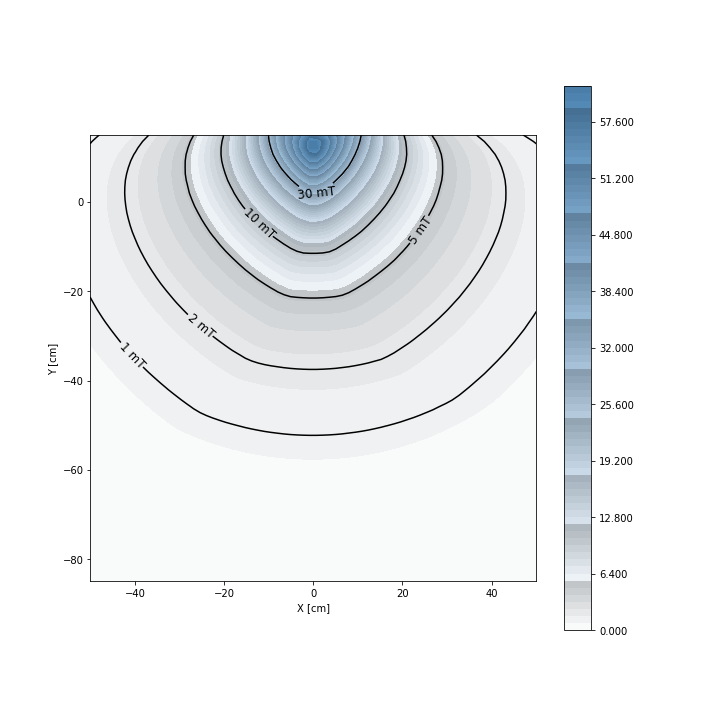

In [16]:
cmap = cmp_alter

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
cs = ax.contour(px_xy*100, py_xy*100, max_field_xy[0]*1000, [1,2, 5, 10 , 30], alpha=1.0, colors='black')
s2 = ax.contourf(px_xy*100, py_xy*100, max_field_xy[0]*1000, 100, cmap=cmap, alpha=1., vmin=0, vmax=65)

ax.clabel(cs, inline=1, fontsize=12, fmt='%1.0f mT')

fig.colorbar(s2)

ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(-50,50)
ax.set_ylim(-85,15)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig("../../../Pictures/navion_large.svg")

<IPython.core.display.Javascript object>


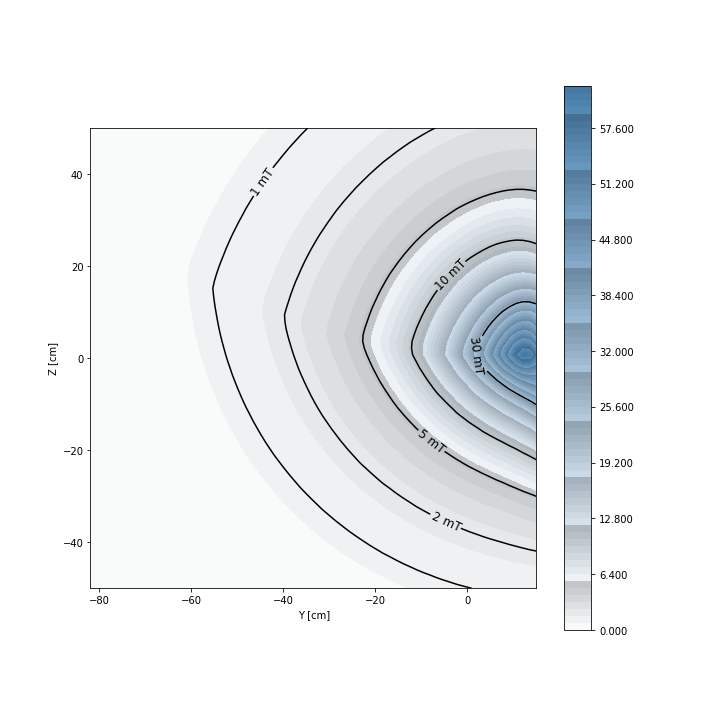

In [19]:
cmap = cmp_alter

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
cs = ax.contour(px_yz*100, py_yz*100, max_field_yz[0]*1000, [1,2, 5, 10 , 30], alpha=1.0, colors='black')
s2 = ax.contourf(px_yz*100, py_yz*100, max_field_yz[0]*1000, 100, cmap=cmap, alpha=1., vmin=0, vmax=65)

ax.clabel(cs, inline=1, fontsize=12, fmt='%1.0f mT')

fig.colorbar(s2)

ax.set_xlabel('Y [cm]')
ax.set_ylabel('Z [cm]')
ax.set_xlim(-82,15)
ax.set_ylim(-50,50)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.savefig("../../../Pictures/navion_large2.svg")

<IPython.core.display.Javascript object>


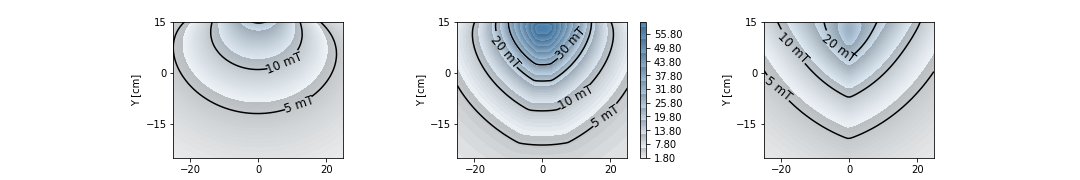

-0.1423076923076923
-0.0038461538461538325
0.13461538461538464


In [812]:
cmap = cmp_alter

fig = plt.figure(figsize=(15, 2.5))

h1 = 5
h2 = 17
h3 = 29

print(offsetz[h1])
print(offsetz[h2])
print(offsetz[h3])

ax = fig.add_subplot(131)
cs = ax.contour(px_xy*100, py_xy*100, max_field_xy[h1]*1000, [5, 10 ,20, 30], alpha=1.0, colors='black')
s2 = ax.contourf(px_xy*100, py_xy*100, max_field_xy[h1]*1000, 100, cmap=cmap, alpha=1., vmin=0, vmax=65)

ax.clabel(cs, inline=1, fontsize=12, fmt='%1.0f mT')

ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,15)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))


ax = fig.add_subplot(132)
cs = ax.contour(px_xy*100, py_xy*100, max_field_xy[h2]*1000, [5, 10 ,20, 30], alpha=1.0, colors='black')
s2 = ax.contourf(px_xy*100, py_xy*100, max_field_xy[h2]*1000, 100, cmap=cmap, alpha=1., vmin=0, vmax=65)

ax.clabel(cs, inline=1, fontsize=12, fmt='%1.0f mT')

ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,15)

ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

fig.colorbar(s2)

ax = fig.add_subplot(133)
cs = ax.contour(px_xy*100, py_xy*100, max_field_xy[h3]*1000, [5, 10 ,20, 30], alpha=1.0, colors='black')
s2 = ax.contourf(px_xy*100, py_xy*100, max_field_xy[h3]*1000, 100, cmap=cmap, alpha=1., vmin=0, vmax=65)

ax.clabel(cs, inline=1, fontsize=12, fmt='%1.0f mT')

ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,15)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))


plt.show()

plt.savefig("../../../Pictures/planes_navion_col.svg")

In [220]:
np.max(max_field_xy)

0.0647088722494847

# Field lines

In [460]:
def ComputeFieldPlane(Nx,Ny,pmin,pmax,offset,I,model_mns,zdir="z"):

    p_ws = np.empty((0,3))
    max_field_mT = np.array([])

    posx_v = np.linspace(pmin[0], pmax[0], Nx, endpoint=True)
    posy_v = np.linspace(pmin[1], pmax[1], Ny, endpoint=True)
    u = np.empty((Nx,Ny))
    v = np.empty((Nx,Ny))
    w = np.empty((Nx,Ny))

    for i in range(posx_v.shape[0]):
        for j in range(posy_v.shape[0]):
                            
                x = posx_v[i]
                y = posy_v[j]

                if zdir == "z":
                    idx = 0
                    idy = 1
                    idz = 2
                    position = np.array([x,y,offset])
                elif zdir == "y":
                    idx = 2
                    idy = 0
                    idz = 1
                    position = np.array([y,offset,x])
                elif zdir == "x":
                    idx = 1
                    idy = 2
                    idz = 0
                    position = np.array([offset,x,y])
            
                
                p_ws = np.append(p_ws, [position], axis=0)                
                J = model_mns.getFieldActuationMatrix(position)
                b = np.matmul(J,I)
                u[j,i] = b[idx]
                v[j,i] = b[idy]
                w[j,i] = b[idz]
                
    px, py = np.meshgrid(posx_v,posy_v)
    #field = griddata((p_ws[:,idx], p_ws[:,idy]), max_field_mT/1000, (px_[None,:], py_[:,None]), method='linear')
    
    return px, py, u, v, w

## XY

In [762]:
#Build initial box
pmin = np.array([-0.25,-0.25])
pmax = np.array([0.25,0.15])
Nx = 30
Ny = 30
offsetz = 0
zdir = 'z'

position = np.array([0.,0.,0.])
J = model_navion.getFieldActuationMatrix(position)

# Field along x
field = np.array([[0.01],[0.0],[0.0]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Ux, Vx, W= ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magx = np.sqrt(Ux**2 + Vx**2 + W**2)
print(I)

# Field along xy
field = np.array([[0.00707],[0.00707],[0.0]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Uxy, Vxy,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magxy = np.sqrt(Uxy**2 + Vxy**2)
print(I)


# Field along y
field = np.array([[0.0],[0.01],[0.0]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Uy, Vy,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magy = np.sqrt(Uy**2 + Vy**2 + W**2)


[[  0.07310749]
 [-12.78222703]
 [ 13.09755377]]
[[-7.14148252]
 [-1.43583076]
 [16.91918955]]


<IPython.core.display.Javascript object>


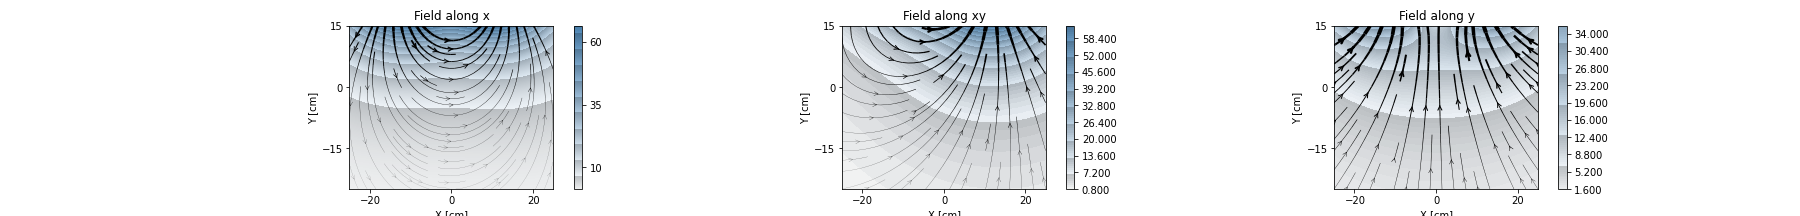

In [763]:
cmap = cmp_alter


fig = plt.figure(figsize=(25, 3))

ax = fig.add_subplot(131)

#  Varying line width along a streamline
lw = 3*magx / magx.max()
s = ax.contourf(X*100, Y*100, magx*1000, levels=1000, alpha=1.,cmap=cmap, vmin=0, vmax=70)
sp = ax.streamplot(X*100, Y*100, Ux, Vx, density=0.8, color='k',linewidth=lw,arrowstyle='->')
fig.colorbar(s, ticks=[10,35,60])

ax.set_title('Field along x')
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,15)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))


ax = fig.add_subplot(132)

#  Varying line width along a streamline
lw = 5*magxy / magxy.max()
ax.streamplot(X*100, Y*100, Uxy, Vxy, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magxy*1000, levels=100, alpha=1.,cmap=cmap, vmin=0., vmax=70)
fig.colorbar(s)
ax.set_title('Field along xy')
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,15)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))



ax = fig.add_subplot(133)

#  Varying line width along a streamline
lw = 5*magy / magy.max()
ax.streamplot(X*100, Y*100, Uy, Vy, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magy*1000, levels=100, alpha=1.,cmap=cmap, vmin=0., vmax=70)
fig.colorbar(s)
ax.set_title('Field along y')
ax.set_xlabel('X [cm]')
ax.set_ylabel('Y [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,15)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

plt.savefig("../../../Pictures/field_xy.svg")

## ZX

In [768]:
#Build initial box
pmin = np.array([-0.25,-0.25])
pmax = np.array([0.25,0.25])
Nx = 30
Ny = 30
offsetz = 0
zdir = 'y'

position = np.array([0.,0.,0.])
J = model_navion.getFieldActuationMatrix(position)

# Field along x
field = np.array([[0.01],[0.0],[0.0]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Ux, Vx,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magx = np.sqrt(Ux**2 + Vx**2 + W**2)
print(I)

# Field along xz
field = np.array([[0.00707],[0.0],[0.00707]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Uxy, Vxy,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magxy = np.sqrt(Uxy**2 + Vxy**2 + W**2)
print(I)


# Field along z
field = np.array([[0.0],[0.0],[0.01]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Uy, Vy,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magy = np.sqrt(Uy**2 + Vy**2 + W**2)
print(I)

[[  0.07310749]
 [-12.78222703]
 [ 13.09755377]]
[[-11.98413875]
 [-14.3844566 ]
 [  3.89233084]]
[[-17.0237988 ]
 [ -7.56353903]
 [ -7.59213533]]


<IPython.core.display.Javascript object>


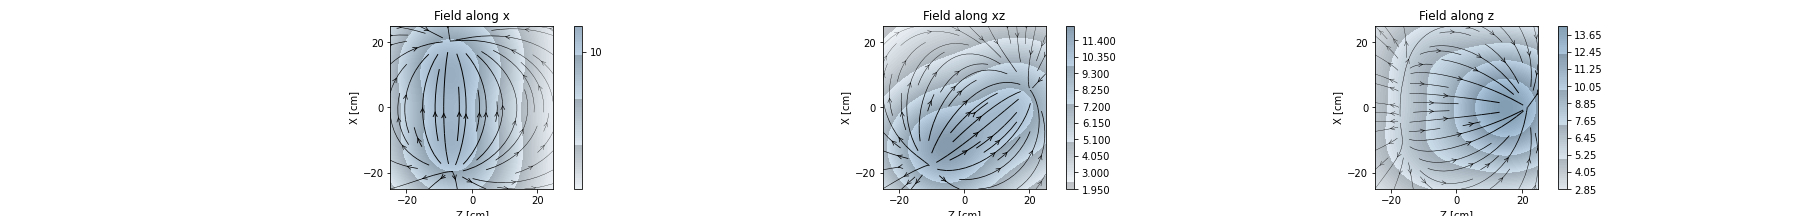

In [771]:
cmap = cmp_alter


fig = plt.figure(figsize=(25, 3))
ax = fig.add_subplot(131)

#  Varying line width along a streamline
lw = 1*magx / magx.max()
ax.streamplot(X*100, Y*100, Ux, Vx, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magx*1000, levels=100, alpha=1.,cmap=cmap, vmin=0, vmax=27)
fig.colorbar(s, ticks=[1,10,15],extend='both')

ax.set_title('Field along x')
ax.set_xlabel('Z [cm]')
ax.set_ylabel('X [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_aspect('equal')

ax = fig.add_subplot(132)

#  Varying line width along a streamline
lw = 1*magxy / magxy.max()
ax.streamplot(X*100, Y*100, Uxy, Vxy, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magxy*1000, levels=100, alpha=1.,cmap=cmap, vmin=0, vmax=27)
fig.colorbar(s)
ax.set_title('Field along xz')
ax.set_xlabel('Z [cm]')
ax.set_ylabel('X [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_aspect('equal')


ax = fig.add_subplot(133)

#  Varying line width along a streamline
lw = 1*magy / magy.max()
ax.streamplot(X*100, Y*100, Uy, Vy, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magy*1000, levels=100, alpha=1.,cmap=cmap, vmin=0, vmax=27)
fig.colorbar(s)
ax.set_title('Field along z')
ax.set_xlabel('Z [cm]')
ax.set_ylabel('X [cm]')
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_aspect('equal')

plt.savefig("../../../Pictures/field_zx.svg")

## YZ

In [752]:
#Build initial box
pmin = np.array([-0.25,-0.25])
pmax = np.array([0.15,0.25])
Nx = 30
Ny = 30
offsetz = 0
zdir = 'x'

position = np.array([0.,0.,0.])
J = model_navion.getFieldActuationMatrix(position)

# Field along x
field = np.array([[0.0],[0.01],[0.0]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Ux, Vx,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magx = np.sqrt(Ux**2 + Vx**2 + W**2)
print(I)

# Field along xz
field = np.array([[0.0],[0.00707],[0.00707]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Uxy, Vxy,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magxy = np.sqrt(Uxy**2 + Vxy**2 + W**2)
print(I)


# Field along z
field = np.array([[0.0],[0.0],[0.01]])
I = np.matmul(np.linalg.inv(J),field)
X, Y, Uy, Vy,W = ComputeFieldPlane(Nx,Ny,pmin,pmax,offsetz,I,model_navion,zdir=zdir)
magy = np.sqrt(Uy**2 + Vy**2 + W**2)
print(I)

[[-10.17421431]
 [ 10.75134901]
 [ 10.8334074 ]]
[[-19.22899527]
 [  2.25378165]
 [  2.29157936]]
[[-17.0237988 ]
 [ -7.56353903]
 [ -7.59213533]]


<IPython.core.display.Javascript object>


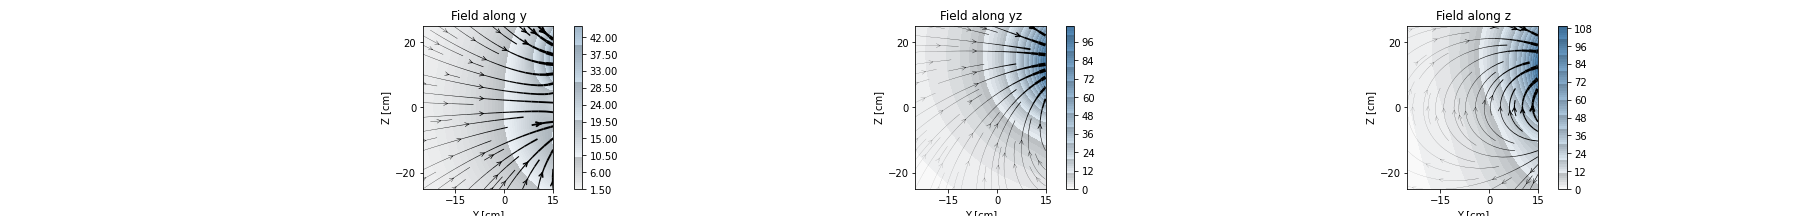

In [753]:
cmap = cmp_alter

fig = plt.figure(figsize=(25, 3))

ax = fig.add_subplot(131)

#  Varying line width along a streamline
lw = 5*magx / magx.max()
ax.streamplot(X*100, Y*100, Ux, Vx, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magx*1000, levels=100, alpha=1.,cmap=cmap, vmin=0, vmax=110)
fig.colorbar(s)#s = ax.contourf(X*100, Y*100, mag, 1000, alpha=1.,cmap=cmap, vmin=0., vmax=0.08)
#fig.colorbar(s)

ax.set_title('Field along y')
ax.set_xlabel('Y [cm]')
ax.set_ylabel('Z [cm]')
ax.set_xlim(-25,15)
ax.set_ylim(-25,25)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_aspect('equal')

ax = fig.add_subplot(132)

#  Varying line width along a streamline
lw = 5*magxy / magxy.max()
ax.streamplot(X*100, Y*100, Uxy, Vxy, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magxy*1000, levels=100, alpha=1.,cmap=cmap, vmin=0, vmax=110)
fig.colorbar(s)
ax.set_title('Field along yz')
ax.set_xlabel('Y [cm]')
ax.set_ylabel('Z [cm]')
ax.set_xlim(-25,15)
ax.set_ylim(-25,25)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_aspect('equal')


ax = fig.add_subplot(133)

#  Varying line width along a streamline
lw = 5*magy / magy.max()
ax.streamplot(X*100, Y*100, Uy, Vy, density=0.6, color='k',linewidth=lw,arrowstyle='->')
s = ax.contourf(X*100, Y*100, magy*1000, levels=100, alpha=1.,cmap=cmap, vmin=0, vmax=110)
fig.colorbar(s)
ax.set_title('Field along z')
ax.set_xlabel('Y [cm]')
ax.set_ylabel('Z [cm]')
ax.set_xlim(-25,15)
ax.set_ylim(-25,25)
ax.set_aspect('equal')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_aspect('equal')


plt.savefig("../../../Pictures/field_yz.svg")